In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import xarray as xr
import numpy as np
from glob import glob
from yllib.function import mysom
from yllib.function import myfunc
from yllib.plot import plot_map
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
year1   = 1981
year2   = 2020
cold_months  = [10,11,12,1,2,3]
warm_months  = [4,5,6,7,8,9]
mapsize = (4,4)
factor  = ('z')
map_extent = [-125+360,-70+360,25,50]
sig_level = 0.95

In [3]:
ds = xr.open_mfdataset(f'reconstruct/correlation/correlation_{mapsize[0]}x{mapsize[1]}_*D.nc',
                      concat_dim='interval', combine='nested')

In [6]:
def plot_ts(r, p, **kwargs):
    mpl.rcParams['font.size'] = 15
    mpl.rcParams['font.family'] = 'Helvetica'  
    
    # create a figure
    if (fig:=kwargs.get('fig')) is None:  
        fig = plt.figure(figsize=(8, 5))
    if (ax:=kwargs.get('ax')) is None:  ax = plt.axes()
    ax.set_axis_on()
    
    c = r.isel(season=0)
    w = r.isel(season=1)
    w  = w.rolling(interval=2, center=True, min_periods=2).mean()
    c  = c.rolling(interval=2, center=True, min_periods=2).mean()
    ax.plot(w.interval, w, marker=".", c="tab:red")
    ax.plot(c.interval, c, marker=".", c="tab:blue")
    
    # add text - title, ananote
    if (title:=kwargs.get('title')) is not None: 
        default_title_kwargs = dict(loc='left')
        default_title_kwargs.update(kwargs.get('title_kwargs', {}))
        ax.set_title(title, **default_title_kwargs)
        
    # return 

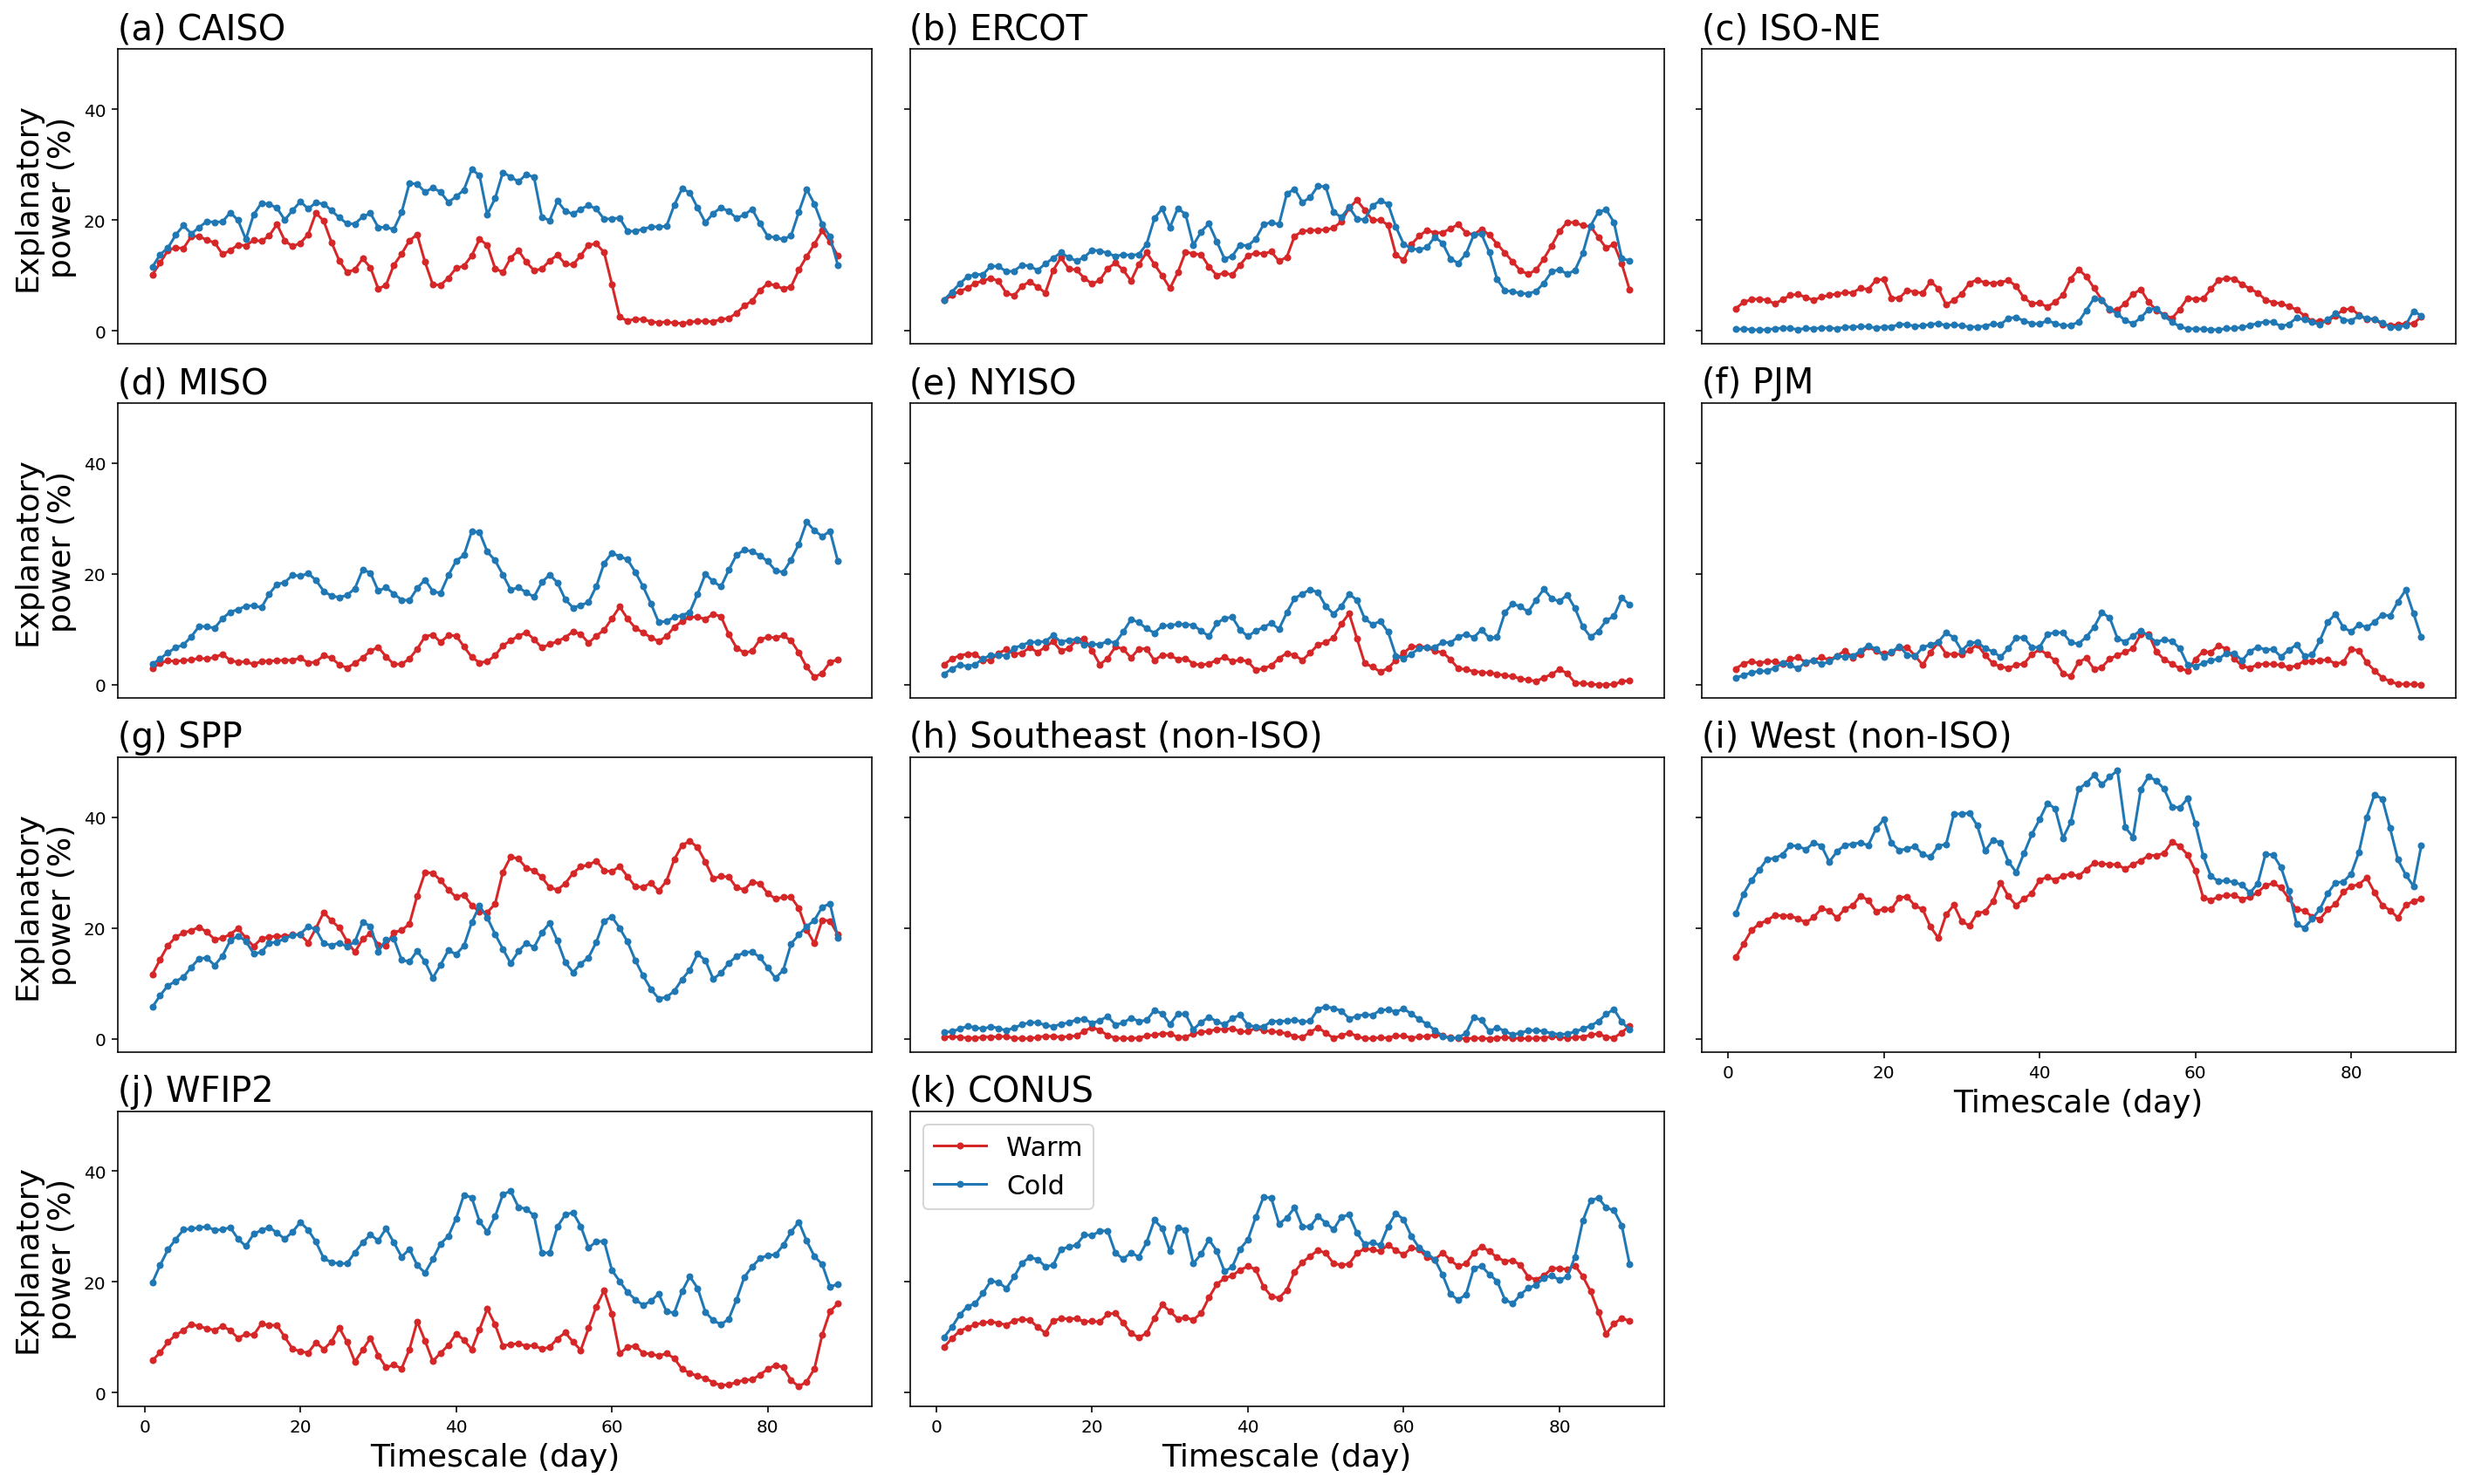

In [7]:
fig, axs = plt.subplots(
    4, 3, figsize=(20, 12), 
    sharey=True,
)
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.98, top=0.95, hspace=0.2, wspace=0.05)
axs = axs.ravel()
isoname = ['CAISO', 'ERCOT', 'ISO-NE', 'MISO', 'NYISO', 'PJM', 'SPP',
           'Southeast (non-ISO)', 'West (non-ISO)', 'WFIP2', 'CONUS']
abcd = list('abcdefghijklmnop')
for ax in axs: ax.set_axis_off()
for i, iso in enumerate(isoname):
    ax = axs[i]
    plot_ts(
        ds['r'].isel(iso=i),
        ds['p'].isel(iso=i),
        fig=fig, ax=ax,
        title=f'({abcd[i]}) {isoname[i]}',
        title_kwargs=dict(fontsize=20),
    )
    if i not in [8,9,10]: ax.set_xticks([])
    if i in [8,9,10]: ax.set_xlabel('Timescale (day)', fontsize=18)
    if i in [0,3,6,9]: ax.set_ylabel("Explanatory\npower (%)", fontsize=18)
ax.legend(["Warm", "Cold"])